In [154]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from scipy.stats.stats import pearsonr

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
all_data = [train,test]

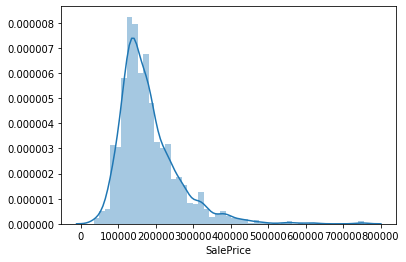

Skewness: 1.88


In [3]:
sns.distplot(train.SalePrice)
plt.show()
print('Skewness: {}'.format(round(train.SalePrice.skew(),2)))

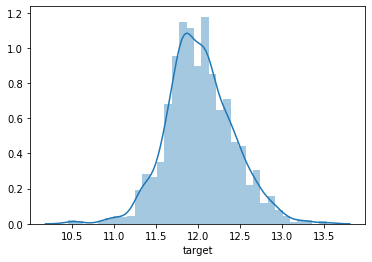

Skewness: 0.12


In [6]:
train['target'] = np.log(train.SalePrice)
sns.distplot(train['target'])
plt.show()
print('Skewness: {}'.format(round(train['target'].skew(),2)))

In [7]:
corr_matrix = train.corr()
corr = pd.DataFrame(corr_matrix['target'].sort_values(ascending=False)).iloc[1:]
corr['SalePrice'] = pd.DataFrame(corr_matrix['SalePrice'].sort_values(ascending=False))
corr.head()

,target,SalePrice
SalePrice,0.948374,1.000000
OverallQual,0.817184,0.790982
GrLivArea,0.700927,0.708624
GarageCars,0.680625,0.640409
GarageArea,0.650888,0.623431


In [20]:
numeric = train.select_dtypes(include=[np.number]).drop(['SalePrice'],axis=1)

In [30]:
train.GarageYrBlt.fillna(0,inplace=True)
train.LotFrontage.fillna(0,inplace=True)

SubClass: little signif or pattern
LotFrontage: 0 for none is throwing off regression
MasVnrArea: 0 for none is throwing off regression
BsmtFinSF1: 0 for none is throwing off regression
BsmtFinSF2: 0 for none is throwing off regression
BsmtUnfSF
TotalBsmtSF
2ndFlrSF, GarageArea
LowQualFinSF, BsmtFullBath, BsmtHalfBath, BedroomAbvGr, KitchenAbvGr, WoodDeckSF, OpenPorchSF,EnclosedPorch - DROP
3SsnPorch, ScreenPorch, PoolArea, MiscVal, MoSold, YrSold =DROP

In [80]:
train.drop(train[train.LotFrontage>150].index,inplace=True)
train.drop(train[train.LotArea>250000].index,inplace=True)
train.drop(train[train['1stFlrSF']>2500].index,inplace=True)
train.drop(train[train['GrLivArea']>3500].index,inplace=True)
train.drop(train[train['GarageCars']>3].index,inplace=True).reset_index(drop=True)

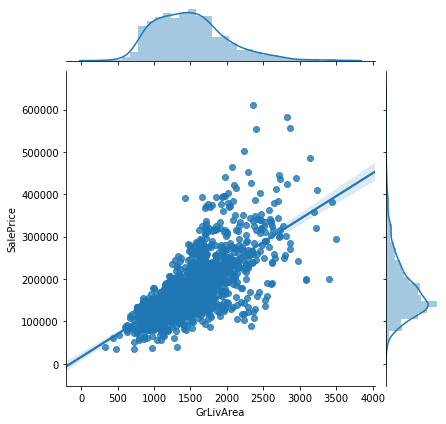

In [155]:
sns.jointplot(x=train['GrLivArea'], y=train['SalePrice'], kind='reg')

In [131]:
var = list(corr.index[1:13])
X = train[var]
y = train.target

In [132]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

In [133]:
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [134]:
model.score(X_test,y_test)

0.8564971183095906

In [135]:
predictions = model.predict(X_test)
mean_squared_error(y_test,predictions)

0.019842429798674174

In [136]:
test['GarageCars'].fillna(1,inplace=True)
test['GarageArea'].fillna(472,inplace=True)
test['TotalBsmtSF'].fillna(1046,inplace=True)
test['GarageYrBlt'].fillna(1979,inplace=True)

In [138]:
predictors = test[var]
predictions = model.predict(predictors)

In [141]:
final_predictions = np.exp(predictions)

In [149]:
Final = pd.DataFrame(test.Id)
Final['SalePrice'] = final_predictions

In [151]:
Final.to_csv('Submission.csv')

In [156]:
corr.head(10)

,target,SalePrice
SalePrice,0.948374,1.000000
OverallQual,0.817184,0.790982
GrLivArea,0.700927,0.708624
GarageCars,0.680625,0.640409
GarageArea,0.650888,0.623431
TotalBsmtSF,0.612134,0.613581
1stFlrSF,0.596981,0.605852
FullBath,0.594771,0.560664
YearBuilt,0.586570,0.522897
YearRemodAdd,0.565608,0.507101
